<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [12]:
pd.set_option('display.max_rows',50)
pd.set_option('display.min_rows',10)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',150)

print(boston_df)
boston_df=pd.DataFrame(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  LSTAT  MEDV
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   4.98  24.0
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   9.14  21.6
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   4.03  34.7
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   2.94  33.4
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   5.33  36.2
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...    ...   ...
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0     21.0   9.67  22.4
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0     21.0   9.08  20.6
503         503  0.06076   0.0  11.93   0.0  0

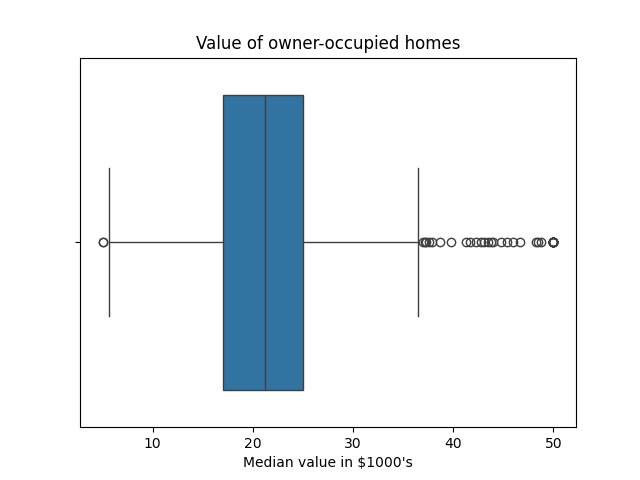

In [21]:
ax = sns.boxplot(x="MEDV", data=boston_df)
pyplot.title("Value of owner-occupied homes")
pyplot.xlabel("Median value in $1000"+"'"+"s")
pyplot.show()

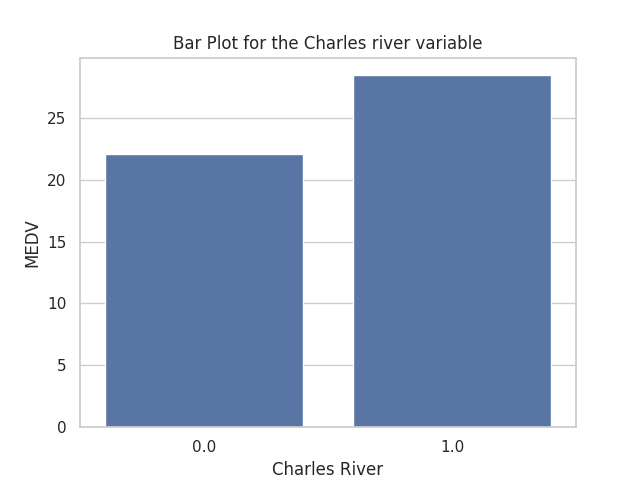

In [30]:
river_data=boston_df.groupby('CHAS')[['MEDV']].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", y='MEDV', data=river_data)
pyplot.title('Bar Plot for the Charles river variable')
pyplot.xlabel('Charles River')
pyplot.show()

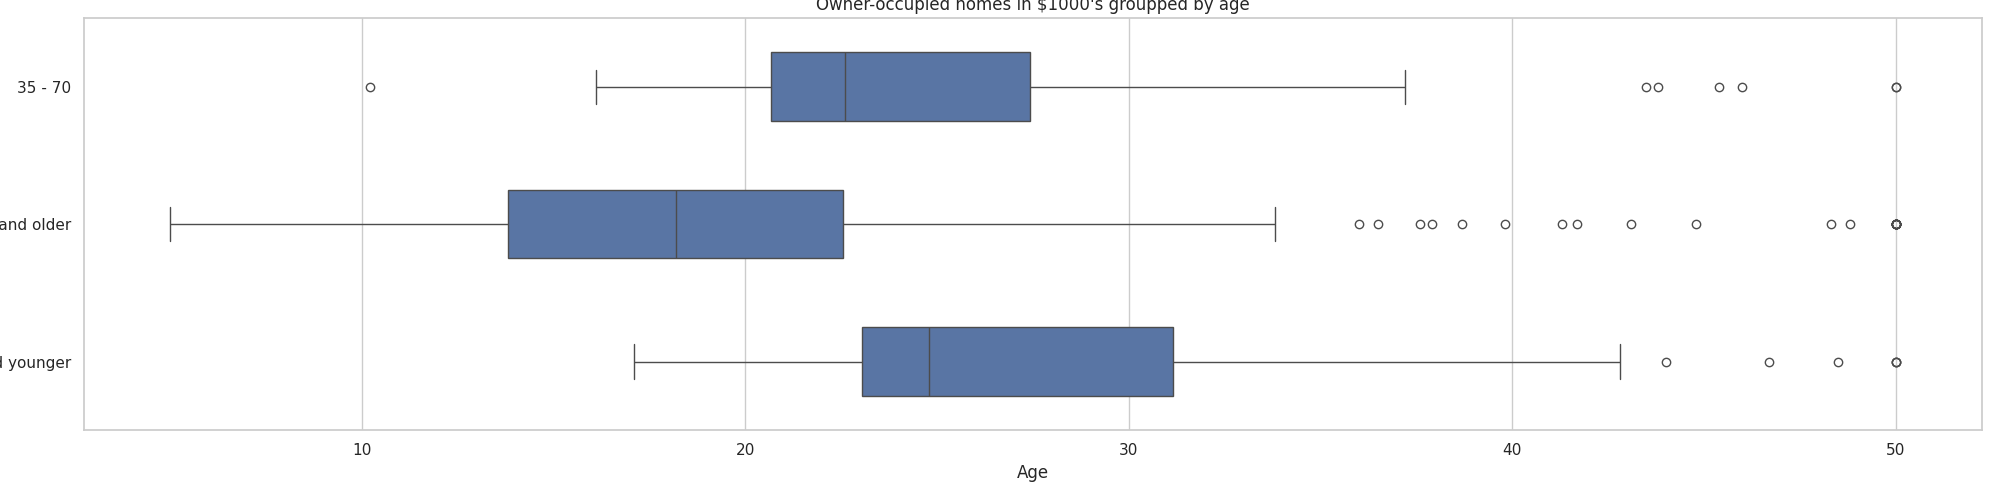

In [80]:
def groupping(i):
    if i['AGE']<=35:
        return '35 and younger'
    elif i['AGE']>35 and i['AGE']<70:
        return '35 - 70'
    elif i['AGE']>=70:
        return '70 and older'

boston_df['Groups']=boston_df.apply(lambda i: groupping(i), axis=1)
ax = sns.boxplot(x="MEDV", y="Groups", data=boston_df, width=0.5)

pyplot.title("Owner-occupied homes in $1000"+"'"+"s groupped by age")
pyplot.xlabel('Age')
pyplot.ylabel("Median value in $1000"+"'"+"s")
pyplot.show()

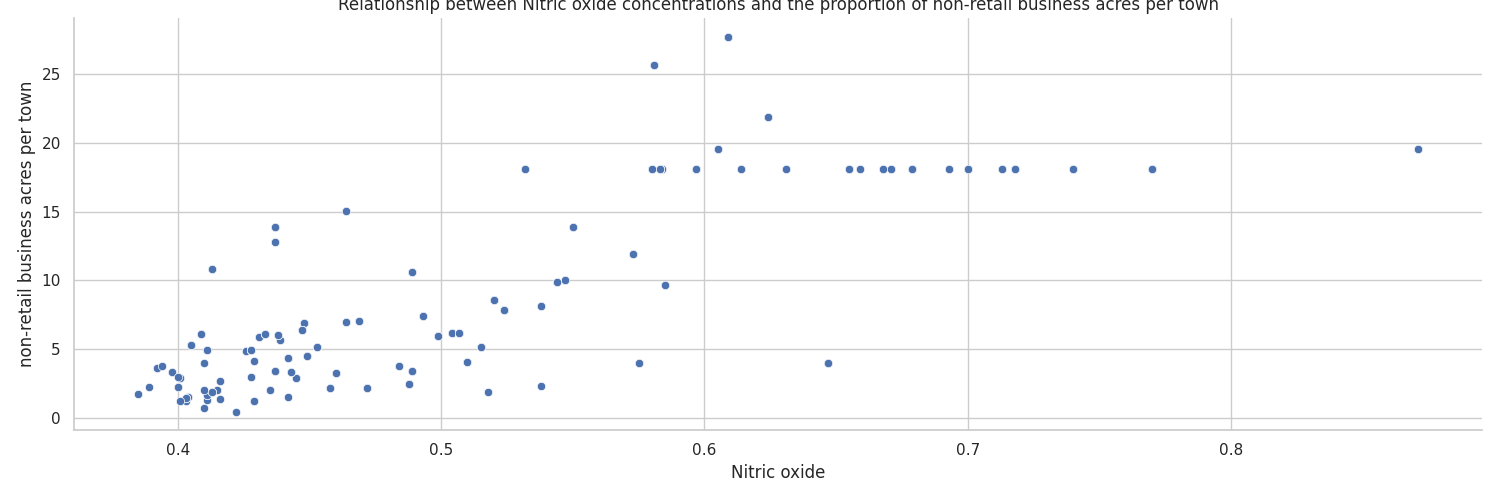

In [78]:
sns.relplot(x="NOX", y="INDUS",
            data=boston_df, height = 5, aspect = 3)
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.xlabel('Nitric oxide')
pyplot.ylabel('non-retail business acres per town')
pyplot.show()

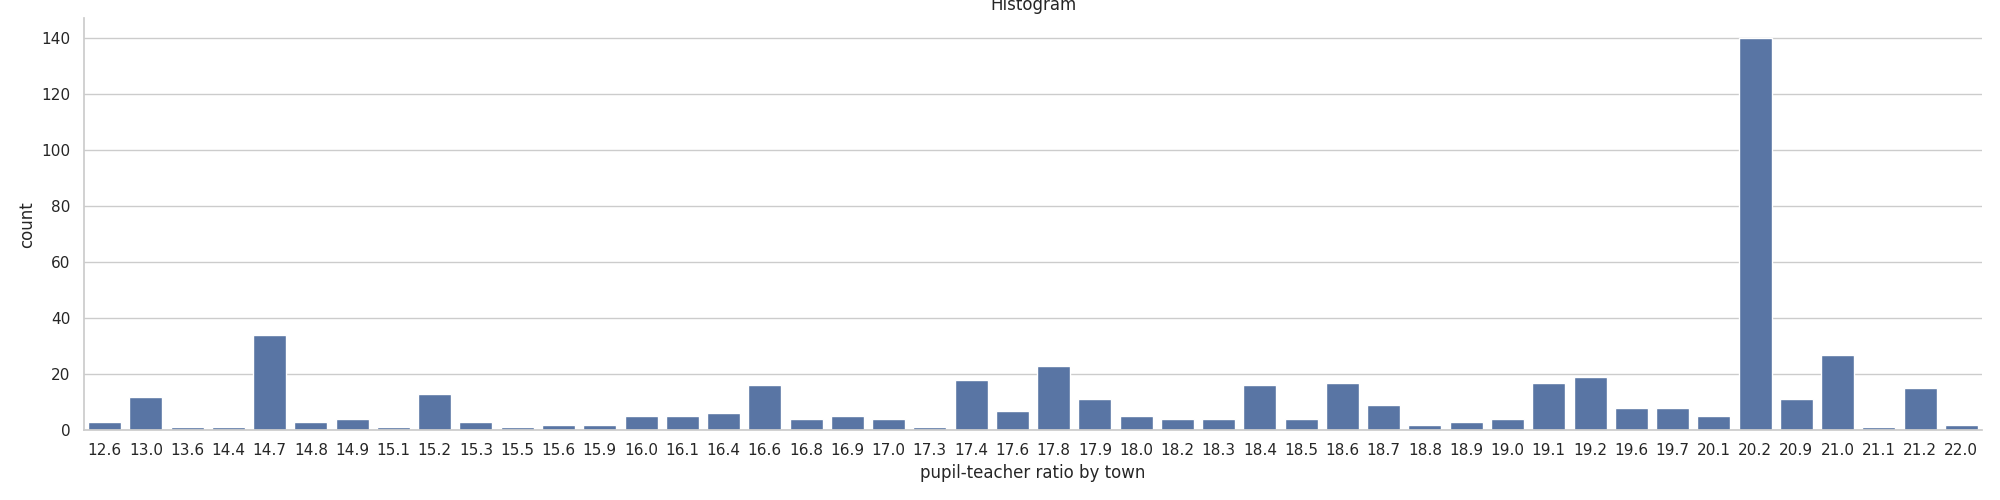

In [79]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df, height = 5, aspect = 4)
pyplot.title('Histogram')
pyplot.xlabel('pupil-teacher ratio by town')
pyplot.show()

<ipython-input-109-ab853782b18c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


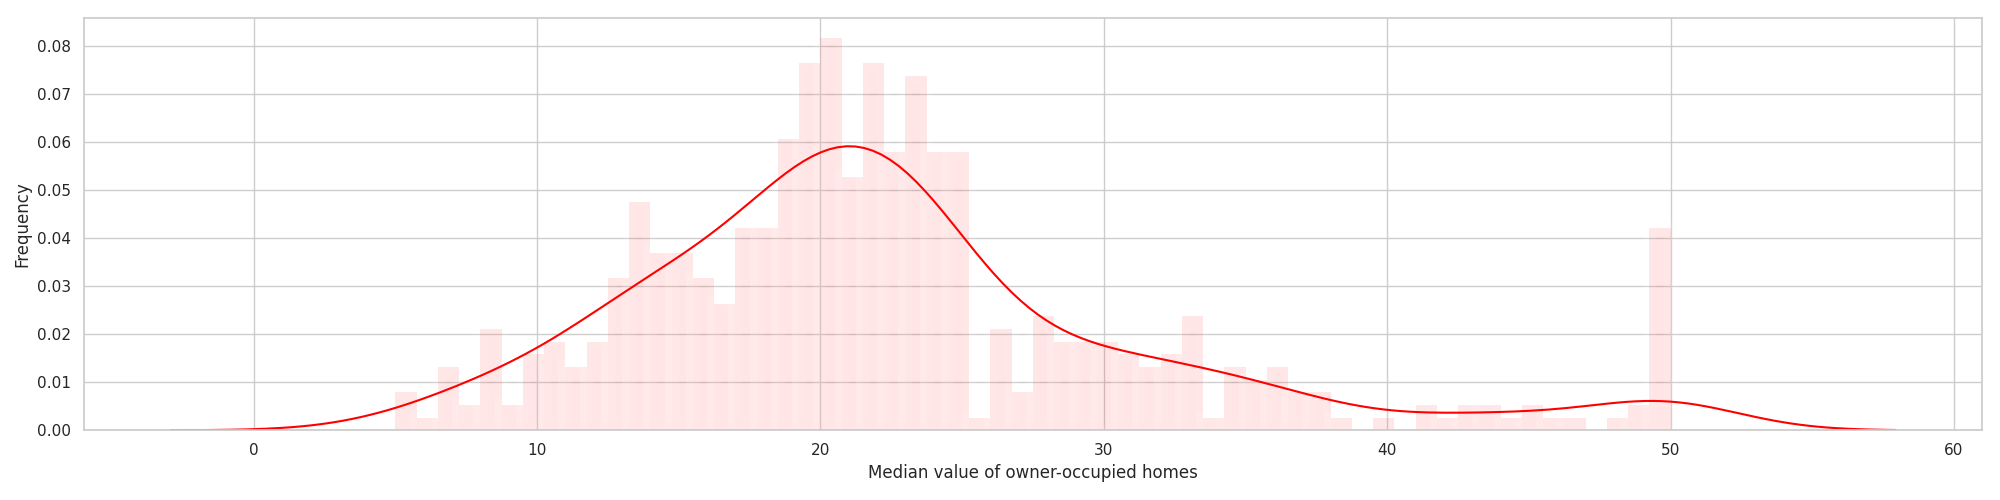

In [109]:
# Is there a significant difference in the median value of houses bounded by the Charles river or not?

# Hypothesis
# H0 - there is no difference in the median value of houses bounded by the Charles river
# H1 - there is a difference in the median value of houses bounded by the Charles river

# Check if the data have normal distribution

ax = sns.distplot(boston_df['MEDV'],
                  bins=60,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 10,'alpha':0.1})
ax.set(xlabel='Median value of owner-occupied homes', ylabel='Frequency')
pyplot.show()

In [97]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median')

# since the p-value is less than 0.05 we can assume variances are not equal

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [98]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

# Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in the median value of houses bounded by the Charles river

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

In [111]:
# Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

# Hypothesis
# H0 - the three population means are equal
# H1 - At least one of the means differ

# check if there is a difference between variances in each group

scipy.stats.levene(boston_df[boston_df['Groups'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['Groups'] == '35 - 70']['MEDV'], 
                   boston_df[boston_df['Groups'] == '70 and older']['MEDV'], 
                   center='median')

# since the p-value is less than 0.05, the variance are not equal

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [112]:
thirtyfive_lower = boston_df[boston_df['Groups'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['Groups'] == '35 - 70']['MEDV']
seventy_older = boston_df[boston_df['Groups'] == '70 and older']['MEDV']

In [113]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# Since the p-value is less than 0.05, we can reject the null hypothesis as there is significant evidence that at least one of the means differ.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


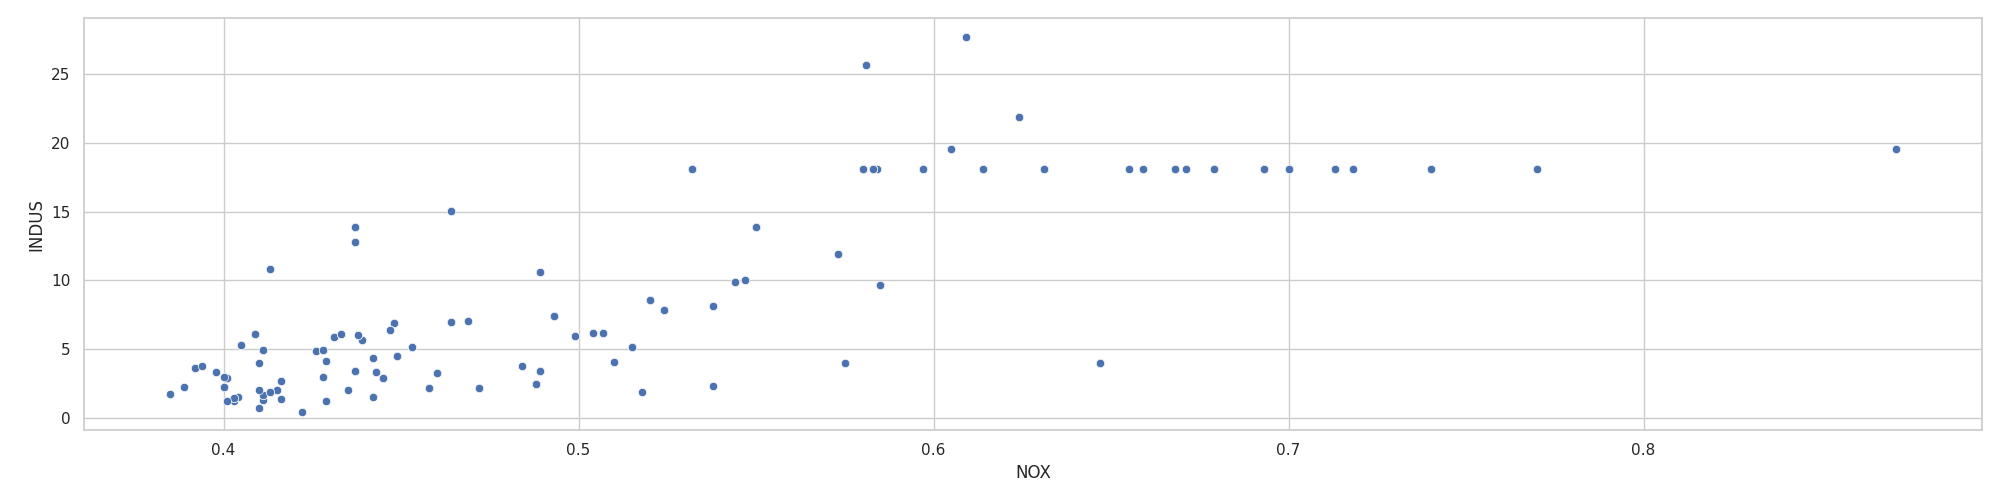

(0.7636514469209189, 7.913361061211254e-98)

In [117]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

# Hypothesis
# H0 - Nitric oxide concentrations is not coralated with proportion of non-retail business acres per town
# H1 - Nitric oxide concentrations is coralated with proportion of non-retail business acres per town

ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
pyplot.show()
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [118]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

# Hypothesis
# H0 - there is no impact an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
# H1 - there is impact an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

# since the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in  median value of owner occupied homes based distance to the five Boston employment centres.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        12:20:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""